In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import cv2                     
import os                  
from random import shuffle 
from tqdm import tqdm   

In [0]:
'''
TRAIN_DIR = 'E:/5th Sem/Soft Computing/dataset/redux CNN/reduxtrain'
TEST_DIR = 'E:/5th Sem/Soft Computing/dataset/redux CNN/reduxtest'
'''

IMG_SIZE = 50
LR = 1e-3

In [0]:
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]
    
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data


def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [0]:
#train_data = create_train_data()
#test_data = process_test_data()

# If the dataset is already created :
train_data = np.load("drive/My Drive/Soft Computing Project/train_data.npy")
test_data = np.load("drive/My Drive/Soft Computing Project/test_data.npy")

train = train_data[:-500]
test = train_data[-500:]

Xtrain = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Ytrain = [i[1] for i in train]

Xtest = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE , IMG_SIZE , 1)
Ytest = [i[1] for i in test]

Ytrain = np.array(Ytrain)
Ytest = np.array(Ytest)

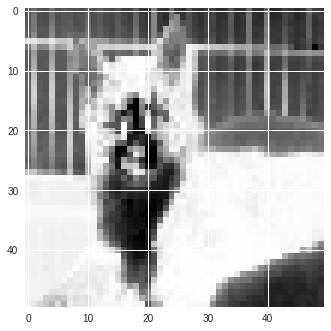

In [14]:
# Showing a random Image 

index = np.random.choice(Xtrain.shape[0])

plt.imshow(Xtrain[index].reshape(50,50))

In [15]:
print(Xtrain.shape)
print(Ytrain.shape)

print(Xtest.shape)
print(Ytest.shape)

(24500, 50, 50, 1)
(24500, 2)
(500, 50, 50, 1)
(500, 2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 25, 25, 64)        0         
__________

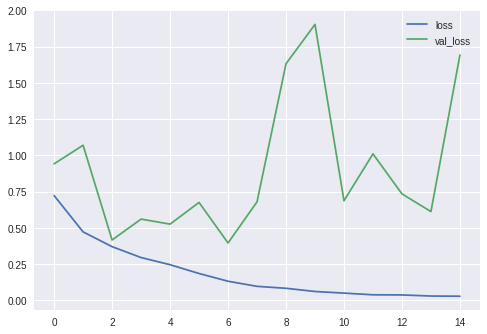

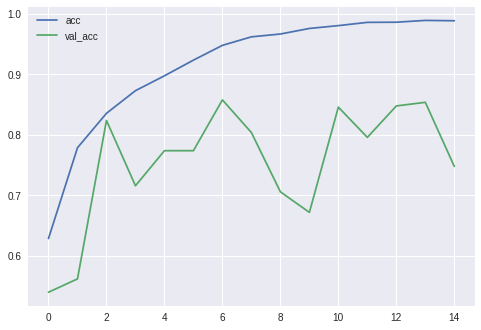

In [16]:
model = Sequential()

model.add(Conv2D(input_shape=(50, 50, 1),  padding='same',filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64,  padding='same', kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, padding='same', kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, padding='same', kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=512, padding='same', kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(units=2))
model.add(Activation('softmax'))

print(model.summary())

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

r = model.fit(Xtrain, Ytrain, batch_size = 256, epochs = 15 , verbose=1, validation_data=(Xtest, Ytest))

#print("Returned:", r)

#print(r.history.keys())


plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

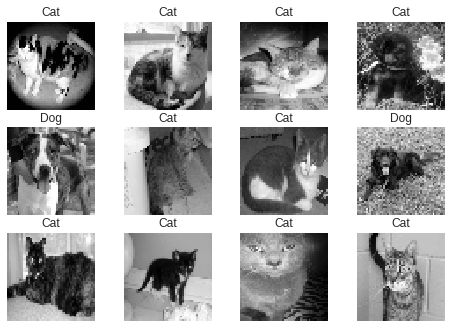

In [17]:
import matplotlib.pyplot as plt

test_data = np.load('drive/My Drive/Soft Computing Project/test_data.npy')

fig=plt.figure()


for num,data in enumerate(test[13:25]):
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    
    orig = img_data
    data = img_data.reshape(1,IMG_SIZE,IMG_SIZE,1)

    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()